In [1]:
#standard imports 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

In [3]:
url='https://raw.githubusercontent.com/wkrzemien/dataScienceAndML2020/master/datasets/iris_data.csv'
urllib.request.urlretrieve(url,'iris_data.csv')
input_file = 'iris_data.csv'
data = pd.read_csv(input_file)

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataSetosa=data[data['species']=='Iris-setosa']
dataVersicolor=data[data['species']=='Iris-versicolor']
dataVirginica=data[data['species']=='Iris-virginica']
datasets =[dataSetosa,dataVersicolor,dataVirginica]

In [6]:
def plotDatasets(datasets, dataSetsLabels, columnsToPlot=None, xLabel='x', yLabel='y', ):
    colors = ['red','green','blue'] 
    if not columnsToPlot:
        columnsToPlot = [0, 1]
    for d, dlabel, color in zip(datasets, dataSetsLabels, colors):
        xdata = d.iloc[:, columnsToPlot[0]]
        ydata = d.iloc[:, columnsToPlot[1]]
        plt.scatter(xdata, ydata, label=dlabel, color = color)
        plt.xlabel(xLabel)
        plt.ylabel(yLabel)
    plt.legend()
    plt.show()

In [7]:
dLabels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

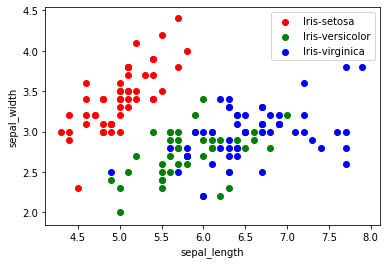

In [8]:
plotDatasets(datasets, dLabels, [0, 1], 'sepal_length', 'sepal_width')

In [9]:
def distance(x,y):
    d = 0
    for i in range(2):
        d = d + math.pow(x[i]- y[i], 2)
    d = math.sqrt(d)
    return d

In [13]:
from operator import itemgetter

def getNeighbours(x, Xtrain, Ytrain, metric=distance): 
    #assing position of main point given by x
    ManiPoint =[ Xtrain.iloc[x][0], Xtrain.iloc[x][1]]
    ListToReturn = []
    for i in range(150):
        if(i == x ): continue
        tempPoint = [ Xtrain.iloc[i][0], Xtrain.iloc[i][1]]
        DIST = distance(ManiPoint,tempPoint)
        Temp = [DIST, Xtrain.iloc[i][0], Xtrain.iloc[i][1], Xtrain.iloc[i][4]]
        ListToReturn.append(Temp)
    
    #now we have data poinst with distance only thing left is to sort them by distance   
    resultList = sorted(ListToReturn, key = itemgetter(0))
    #print(resultList)
    return resultList

In [19]:
def getKNNeighbours(neighbours, k):
    KNNeighbours = []
    for i in range(k):
        KNNeighbours.append(neighbours[i])
    return KNNeighbours

In [31]:
def majorityVote(neighbours):
    Iris_setosa = 0
    Iris_versicolor = 0
    Iris_virginica = 0
    #we are counting how many neigbouts of given type we have
    for i in range(0, len(neighbours)):
        if(neighbours[i][3] == "Iris-setosa"): Iris_setosa = Iris_setosa+1
        if(neighbours[i][3] == "Iris-versicolor"): Iris_versicolor = Iris_versicolor+1 
        if(neighbours[i][3] == "Iris-virginica"): Iris_virginica = Iris_virginica+1
    #return majority class, lazy programing
    if(Iris_setosa>Iris_versicolor and Iris_setosa>Iris_virginica): return 0
    if(Iris_versicolor>Iris_setosa and Iris_versicolor>Iris_virginica): return 1
    if(Iris_virginica>Iris_setosa and Iris_virginica>Iris_versicolor): return 2
    #if above conditions are not met give -1, maybe some error would be better
    else: return -1

In [33]:
def meanSquaredError(v, w):
    MSE = 0
    for i in range(0, len(v)):
         MSE = MSE + math.pow(v[ic] - w[ic], 2)
    MSE = MSE/len(v)
    return MSE

0